## Intro to variables of dataset (need change i just copied)

1. Age - Numerical - Days
2. Height - Numerical - Cm
3. Weight - Numerical - Kg
4. Gender - Categorical - 1/0
5. Systolic Blood Pressure (ap_hi) - Numerical - mmHg
6. Systolic Blood Pressure (ap_lo) - Numerical - mmHg
7. Cholesterol - Categorical - 1-3
8. Glucose - Categorical - 1-3
9. Smoke - Categorical - 1/0
10. Alcohol Intake - Categorical - 1/0
11. Physical Activity - Categorical - 1/0
12. Cardio - Categorical - 1/0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
cardioData = pd.read_csv('cardio_train.csv',delimiter=';')
cardioData.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
cardioData.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
cardioData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There is a total of 70000 rows of data with 12 columns

## CLEAN DATA 

#### Rename data so its easier to read on the table

In [5]:
df_cleaned = cardioData.copy()
df_cleaned.rename(columns = {'ap_hi': 'Systolic_BP'}, inplace = True)
df_cleaned.rename(columns = {'ap_lo': 'Diastolic_BP'}, inplace = True)
df_cleaned.rename(columns = {'gluc': 'Glucose'}, inplace = True)
df_cleaned.rename(columns = {'alco': 'Alcohol'}, inplace = True)
df_cleaned.rename(columns = {'cardio': 'Cardio_Patient'}, inplace = True)
df_cleaned.columns = df_cleaned.columns.str.upper()


# Dropping unneeded ID column
if 'id' in cardioData.columns:
    cardioData.drop("id", axis=1, inplace=True)
else:
    print("Column 'id' does not exist in the DataFrame.")


print(df_cleaned.head(30))

    ID    AGE  GENDER  HEIGHT  WEIGHT  SYSTOLIC_BP  DIASTOLIC_BP  CHOLESTEROL  \
0    0  18393       2     168    62.0          110            80            1   
1    1  20228       1     156    85.0          140            90            3   
2    2  18857       1     165    64.0          130            70            3   
3    3  17623       2     169    82.0          150           100            1   
4    4  17474       1     156    56.0          100            60            1   
5    8  21914       1     151    67.0          120            80            2   
6    9  22113       1     157    93.0          130            80            3   
7   12  22584       2     178    95.0          130            90            3   
8   13  17668       1     158    71.0          110            70            1   
9   14  19834       1     164    68.0          110            60            1   
10  15  22530       1     169    80.0          120            80            1   
11  16  18815       2     17

##### check if there are any missing values per column

In [6]:
print(df_cleaned.isnull().sum()) 

ID                0
AGE               0
GENDER            0
HEIGHT            0
WEIGHT            0
SYSTOLIC_BP       0
DIASTOLIC_BP      0
CHOLESTEROL       0
GLUCOSE           0
SMOKE             0
ALCOHOL           0
ACTIVE            0
CARDIO_PATIENT    0
dtype: int64


Number Of Missing Data : 0

##### check for any (Height/Weight) outliers in dataset 

In [7]:
print(df_cleaned[['HEIGHT', 'WEIGHT']].describe())

             HEIGHT        WEIGHT
count  70000.000000  70000.000000
mean     164.359229     74.205690
std        8.210126     14.395757
min       55.000000     10.000000
25%      159.000000     65.000000
50%      165.000000     72.000000
75%      170.000000     82.000000
max      250.000000    200.000000


In [8]:
outliers = df_cleaned[(df_cleaned['HEIGHT'] > 200) | (df_cleaned['WEIGHT'] > 200)]
print(outliers)

          ID    AGE  GENDER  HEIGHT  WEIGHT  SYSTOLIC_BP  DIASTOLIC_BP  \
6486    9223  21220       1     250    86.0          140           100   
21628  30894  19054       2     207    78.0          100            70   

       CHOLESTEROL  GLUCOSE  SMOKE  ALCOHOL  ACTIVE  CARDIO_PATIENT  
6486             3        1      0        0       1               1  
21628            1        1      0        1       1               0  


Found 2 unrealistic heights from the data, need to remove from data

In [9]:
#removal of the 2 weird data
df_cleaned = df_cleaned.drop([6486, 21628])

In [10]:
#checking if outlier got removed
outliers = df_cleaned[(df_cleaned['HEIGHT'] > 200) | (df_cleaned['WEIGHT'] > 200)]
print(outliers)

Empty DataFrame
Columns: [ID, AGE, GENDER, HEIGHT, WEIGHT, SYSTOLIC_BP, DIASTOLIC_BP, CHOLESTEROL, GLUCOSE, SMOKE, ALCOHOL, ACTIVE, CARDIO_PATIENT]
Index: []


Removed outlier successfully

##### check for any (Systolic_BP/Diastolic_BP) outliers in dataset 

In [11]:
print(df_cleaned['SYSTOLIC_BP'].describe())
print(df_cleaned['DIASTOLIC_BP'].describe())

count    69998.000000
mean       128.817538
std        154.013575
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: SYSTOLIC_BP, dtype: float64
count    69998.000000
mean        96.630747
std        188.475196
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: DIASTOLIC_BP, dtype: float64


Remove negative and Filter Out Implausible High Values

In [12]:
df_cleaned = df_cleaned[(df_cleaned['SYSTOLIC_BP'] > 0) & (df_cleaned['DIASTOLIC_BP'] > 0)]
df_cleaned = df_cleaned[(df_cleaned['SYSTOLIC_BP'] < 200) & (df_cleaned['DIASTOLIC_BP'] < 120)]

Recheck for odd values for SYSTOLIC_BP and DIASTOLIC_BP

In [13]:
print(df_cleaned['SYSTOLIC_BP'].describe())
print(df_cleaned['DIASTOLIC_BP'].describe())

count    68583.000000
mean       126.100725
std         17.106687
min          7.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        197.000000
Name: SYSTOLIC_BP, dtype: float64
count    68583.000000
mean        81.113702
std          9.242344
min          1.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        119.000000
Name: DIASTOLIC_BP, dtype: float64


##### To understand the data better, we want to convert the age data from days to years.

In [14]:
#check the data format for age
print(df_cleaned['AGE'].head())

0    18393
1    20228
2    18857
3    17623
4    17474
Name: AGE, dtype: int64


In [15]:
# create function to convert days to years
def days_to_years(days):
    days_per_year = 365.25
    return days / days_per_year

# apply function to the 'age' column
df_cleaned['AGE'] = df_cleaned['AGE'].apply(days_to_years)

# round age to nearest interger
df_cleaned['AGE'] = df_cleaned['AGE'].round().astype(int)

#check if age data updated
print(df_cleaned.head())


   ID  AGE  GENDER  HEIGHT  WEIGHT  SYSTOLIC_BP  DIASTOLIC_BP  CHOLESTEROL  \
0   0   50       2     168    62.0          110            80            1   
1   1   55       1     156    85.0          140            90            3   
2   2   52       1     165    64.0          130            70            3   
3   3   48       2     169    82.0          150           100            1   
4   4   48       1     156    56.0          100            60            1   

   GLUCOSE  SMOKE  ALCOHOL  ACTIVE  CARDIO_PATIENT  
0        1      0        0       1               0  
1        1      0        0       1               1  
2        1      0        0       0               1  
3        1      0        0       1               1  
4        1      0        0       0               0  


In [16]:
# Check the unique values and their counts in the 'gender' column
print(df_cleaned['GENDER'].value_counts())

GENDER
1    44705
2    23878
Name: count, dtype: int64


In [17]:
duplicates = df_cleaned.columns[df_cleaned.columns.duplicated()].tolist()
print("Duplicated columns:", duplicates)
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.duplicated()]

Duplicated columns: []


#### CATERGORISING BMI

In [18]:
# Calculate BMI
df_cleaned['BMI'] = df_cleaned['WEIGHT'] / ((df_cleaned['HEIGHT'] / 100) ** 2)

# Define BMI bins and labels
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']

# Categorize BMI
df_cleaned['BMI_Category'] = pd.cut(df_cleaned['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

# Reorder columns to place 'age', 'gender', 'weight', 'height', 'BMI' and 'BMI_Category' in front
columns_order = ['AGE', 'GENDER', 'WEIGHT', 'HEIGHT', 'BMI', 'BMI_Category'] + [col for col in df_cleaned.columns if col not in ['AGE', 'GENDER', 'WEIGHT', 'HEIGHT', 'BMI', 'BMI_Category']]
df_cleaned = df_cleaned[columns_order]

# Display the DataFrame with the new BMI and BMI Category columns
print(df_cleaned)

       AGE  GENDER  WEIGHT  HEIGHT        BMI   BMI_Category     ID  \
0       50       2    62.0     168  21.967120  Normal weight      0   
1       55       1    85.0     156  34.927679        Obesity      1   
2       52       1    64.0     165  23.507805  Normal weight      2   
3       48       2    82.0     169  28.710479     Overweight      3   
4       48       1    56.0     156  23.011177  Normal weight      4   
...    ...     ...     ...     ...        ...            ...    ...   
69995   53       2    76.0     168  26.927438     Overweight  99993   
69996   62       1   126.0     158  50.472681        Obesity  99995   
69997   52       2   105.0     183  31.353579        Obesity  99996   
69998   61       1    72.0     163  27.099251     Overweight  99998   
69999   56       1    72.0     170  24.913495     Overweight  99999   

       SYSTOLIC_BP  DIASTOLIC_BP  CHOLESTEROL  GLUCOSE  SMOKE  ALCOHOL  \
0              110            80            1        1      0        0   

#### CATEGORISING BP LEVELS

In [19]:
# Function to categorize blood pressure
def categorize_blood_pressure(row):
    systolic = row['SYSTOLIC_BP']
    diastolic = row['DIASTOLIC_BP']
    
    
    if systolic >= 180 or diastolic >= 120:
        return 'Hypertensive Crisis'
    elif systolic >= 140 or diastolic >= 90:
        return 'Hypertension Stage 2'
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
        return 'Hypertension Stage 1'
    elif 120 <= systolic <= 129 and diastolic < 80:
        return 'Elevated'
    elif systolic < 120 and diastolic < 80:
        return 'Normal'
    else:
        return 'Unknown'  # Catch-all for unexpected values
# Apply the function to each row in the DataFrame
df_cleaned['BP_Category'] = df_cleaned.apply(categorize_blood_pressure, axis=1)

# Display the DataFrame with the new BP_Category column
print(df_cleaned.head(20))

    AGE  GENDER  WEIGHT  HEIGHT        BMI   BMI_Category  ID  SYSTOLIC_BP  \
0    50       2    62.0     168  21.967120  Normal weight   0          110   
1    55       1    85.0     156  34.927679        Obesity   1          140   
2    52       1    64.0     165  23.507805  Normal weight   2          130   
3    48       2    82.0     169  28.710479     Overweight   3          150   
4    48       1    56.0     156  23.011177  Normal weight   4          100   
5    60       1    67.0     151  29.384676     Overweight   8          120   
6    61       1    93.0     157  37.729725        Obesity   9          130   
7    62       2    95.0     178  29.983588        Obesity  12          130   
8    48       1    71.0     158  28.440955     Overweight  13          110   
9    54       1    68.0     164  25.282570     Overweight  14          110   
10   62       1    80.0     169  28.010224     Overweight  15          120   
11   52       2    60.0     173  20.047446  Normal weight  16   

#### Plotting the Boxplots for the Numerical Variables.

<Axes: xlabel='CARDIO_PATIENT', ylabel='DIASTOLIC_BP'>

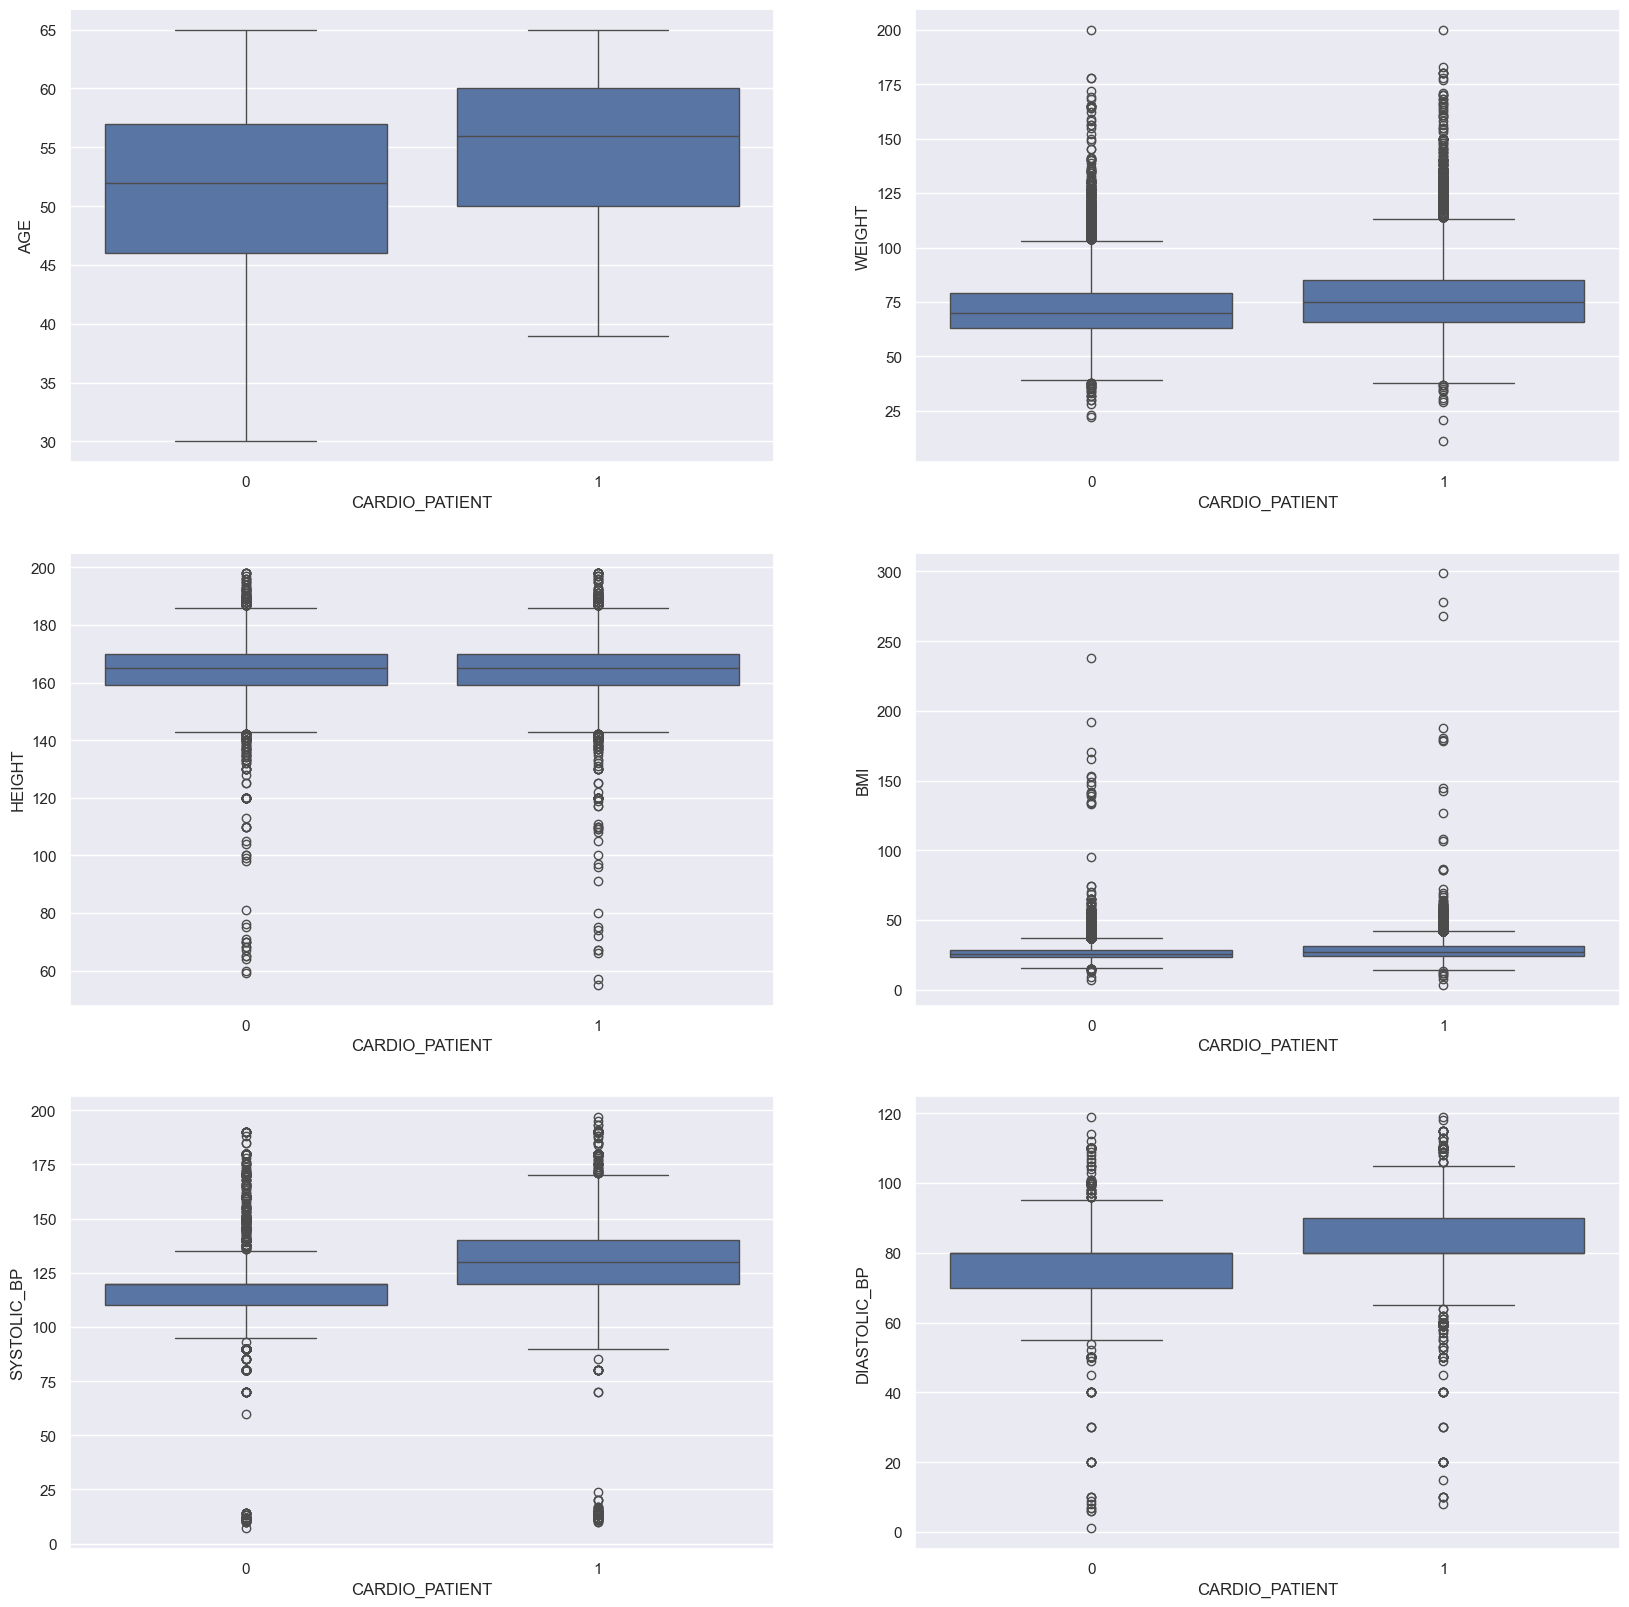

In [20]:
f, axes = plt.subplots(3, 2, figsize=(20, 20))

sb.boxplot(x = 'CARDIO_PATIENT', y = 'AGE', data = df_cleaned, ax=axes[0,0])
sb.boxplot(x = 'CARDIO_PATIENT', y = 'WEIGHT', data = df_cleaned, ax=axes[0,1])
sb.boxplot(x = 'CARDIO_PATIENT', y = 'HEIGHT', data = df_cleaned, ax=axes[1,0])
sb.boxplot(x = 'CARDIO_PATIENT', y = 'BMI', data = df_cleaned, ax=axes[1,1])
sb.boxplot(x = 'CARDIO_PATIENT', y = 'SYSTOLIC_BP', data = df_cleaned, ax=axes[2,0])
sb.boxplot(x = 'CARDIO_PATIENT', y = 'DIASTOLIC_BP', data = df_cleaned, ax=axes[2,1])

From the Boxplots, we can conclude Age, SYSTOLIC_BP and DIASTOLIC_BP are key factor link to Cardio_Patient

#### Plotting Correlation & Heatmap

In [21]:
# Correlation Matrix
numvars=df_cleaned[['CARDIO_PATIENT','GENDER','CHOLESTEROL','GLUCOSE','SMOKE','ALCOHOL', 'ACTIVE']]
print(numvars.corr())

                CARDIO_PATIENT    GENDER  CHOLESTEROL   GLUCOSE     SMOKE  \
CARDIO_PATIENT        1.000000  0.006949     0.220906  0.088257 -0.016923   
GENDER                0.006949  1.000000    -0.037297 -0.021002  0.338371   
CHOLESTEROL           0.220906 -0.037297     1.000000  0.449827  0.009313   
GLUCOSE               0.088257 -0.021002     0.449827  1.000000 -0.005757   
SMOKE                -0.016923  0.338371     0.009313 -0.005757  1.000000   
ALCOHOL              -0.009613  0.170479     0.034017  0.009757  0.340041   
ACTIVE               -0.037560  0.005113     0.009279 -0.007539  0.025360   

                 ALCOHOL    ACTIVE  
CARDIO_PATIENT -0.009613 -0.037560  
GENDER          0.170479  0.005113  
CHOLESTEROL     0.034017  0.009279  
GLUCOSE         0.009757 -0.007539  
SMOKE           0.340041  0.025360  
ALCOHOL         1.000000  0.024940  
ACTIVE          0.024940  1.000000  


<Axes: >

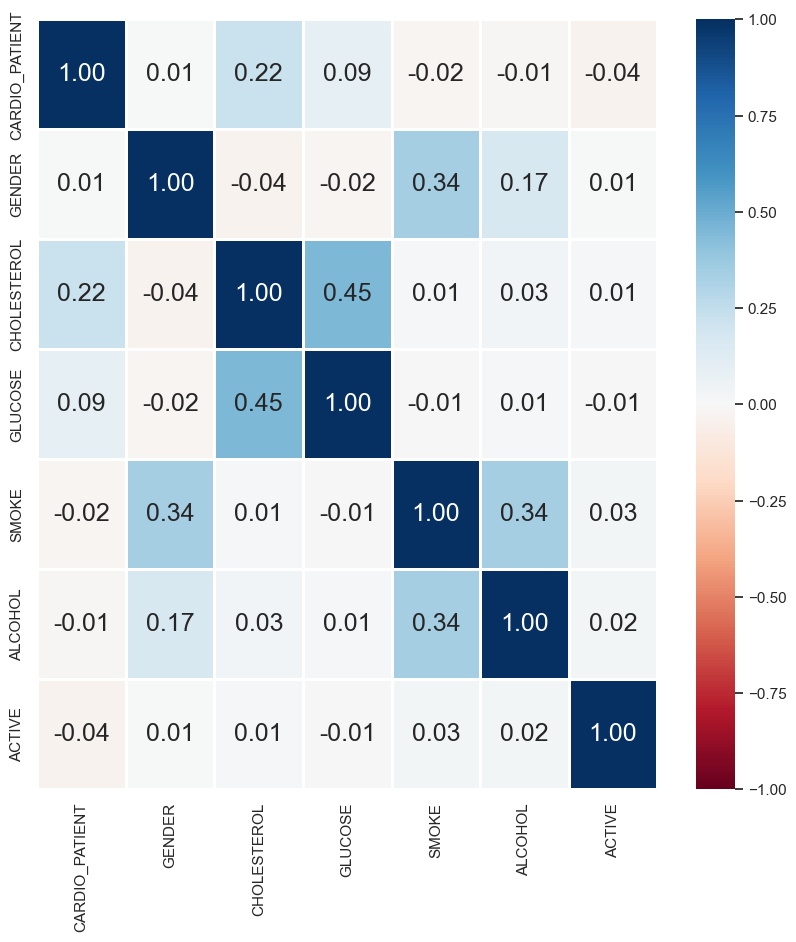

In [22]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(numvars.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

From this heatmap, we can also conclude that only Cholesterol is slightly positive correlated to Cardio_Patient

#### MACHINE LEARNING MODELS

#### XGBoost

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split


def check(X_train_train, X_train_val, y_train_train, y_train_val):

    model = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42, colsample_bytree=0.8)

    # Fit the model to the training data
    model.fit(X_train_train, y_train_train)

    # Make predictions on the training and validation data
    y_train_pred = model.predict(X_train_train)
    y_val_pred = model.predict(X_train_val)

    # Calculate accuracy on the training and validation data
    train_acc = accuracy_score(y_train_train, y_train_pred)
    val_acc = accuracy_score(y_train_val, y_val_pred)

    # Return the accuracy scores
    return train_acc, val_acc

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned[['AGE', 'CHOLESTEROL', 'SYSTOLIC_BP', 'DIASTOLIC_BP' , 'BMI']], df_cleaned['CARDIO_PATIENT'], test_size=0.2, random_state=69)
xgb = XGBClassifier(learning_rate=0.2, max_depth=4, n_estimators=50, random_state=42, colsample_bytree=0.8)
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Evaluate the performance of the XGBoost model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Define a parameter grid for the XGBoost model
# Including hyperparameters to increase the accuracy of the model, and to reduce overfitting
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]
}

# # Create an instance of the GridSearchCV class
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Accuracy: 0.734125537654006
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.732384377685698
